                                            MULTIPLE LINEAR REGRESSION                                                  

Assignment Task:                                        

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.                   

Dataset Description:               

The dataset consists of the following variables:             

Age: Age in years                                    
KM: Accumulated Kilometers on odometer                                  
FuelType: Fuel Type (Petrol, Diesel, CNG)                                           
HP: Horse Power                                             
Automatic: Automatic (Yes=1, No=0)                                        
CC: Cylinder Volume in cubic centimeters                                            
Doors: Number of doors                                                  
Weight: Weight in Kilograms                                             
Quarterly_Tax:                                              
Price: Offer Price in EUROs                         


Tasks:                            

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
cols = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Weight', 'Price']
df = df[cols]

In [4]:
print(df.head())

   Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Weight  Price
0         23  46986    Diesel  90          0  2000      3    1165  13500
1         23  72937    Diesel  90          0  2000      3    1165  13750
2         24  41711    Diesel  90          0  2000      3    1165  13950
3         26  48000    Diesel  90          0  2000      3    1165  14950
4         30  38500    Diesel  90          0  2000      3    1170  13750


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age_08_04  1436 non-null   int64 
 1   KM         1436 non-null   int64 
 2   Fuel_Type  1436 non-null   object
 3   HP         1436 non-null   int64 
 4   Automatic  1436 non-null   int64 
 5   cc         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Weight     1436 non-null   int64 
 8   Price      1436 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 101.1+ KB
None


In [6]:
print(df.isnull().sum())

Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Weight       0
Price        0
dtype: int64


In [7]:
print(df.describe())

         Age_08_04             KM           HP    Automatic           cc  \
count  1436.000000    1436.000000  1436.000000  1436.000000   1436.00000   
mean     55.947075   68533.259749   101.502089     0.055710   1576.85585   
std      18.599988   37506.448872    14.981080     0.229441    424.38677   
min       1.000000       1.000000    69.000000     0.000000   1300.00000   
25%      44.000000   43000.000000    90.000000     0.000000   1400.00000   
50%      61.000000   63389.500000   110.000000     0.000000   1600.00000   
75%      70.000000   87020.750000   110.000000     0.000000   1600.00000   
max      80.000000  243000.000000   192.000000     1.000000  16000.00000   

             Doors      Weight         Price  
count  1436.000000  1436.00000   1436.000000  
mean      4.033426  1072.45961  10730.824513  
std       0.952677    52.64112   3626.964585  
min       2.000000  1000.00000   4350.000000  
25%       3.000000  1040.00000   8450.000000  
50%       4.000000  1070.00000   

In [8]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

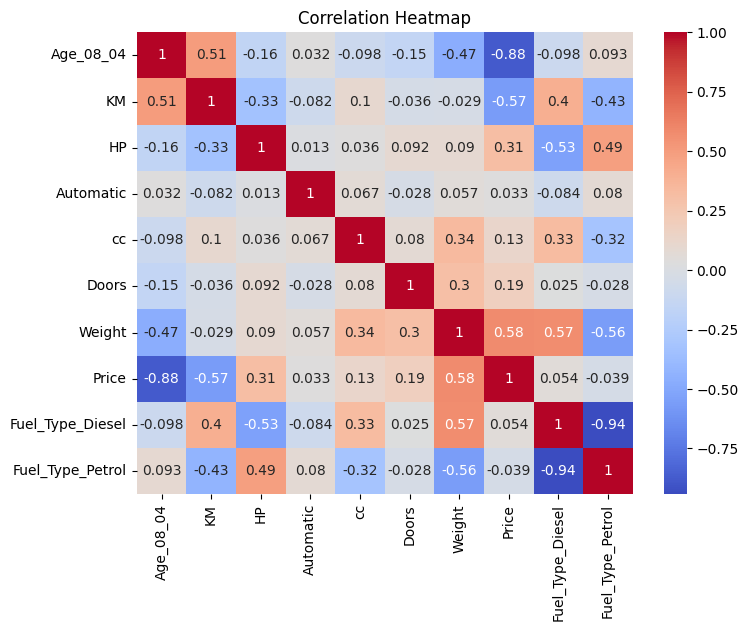

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


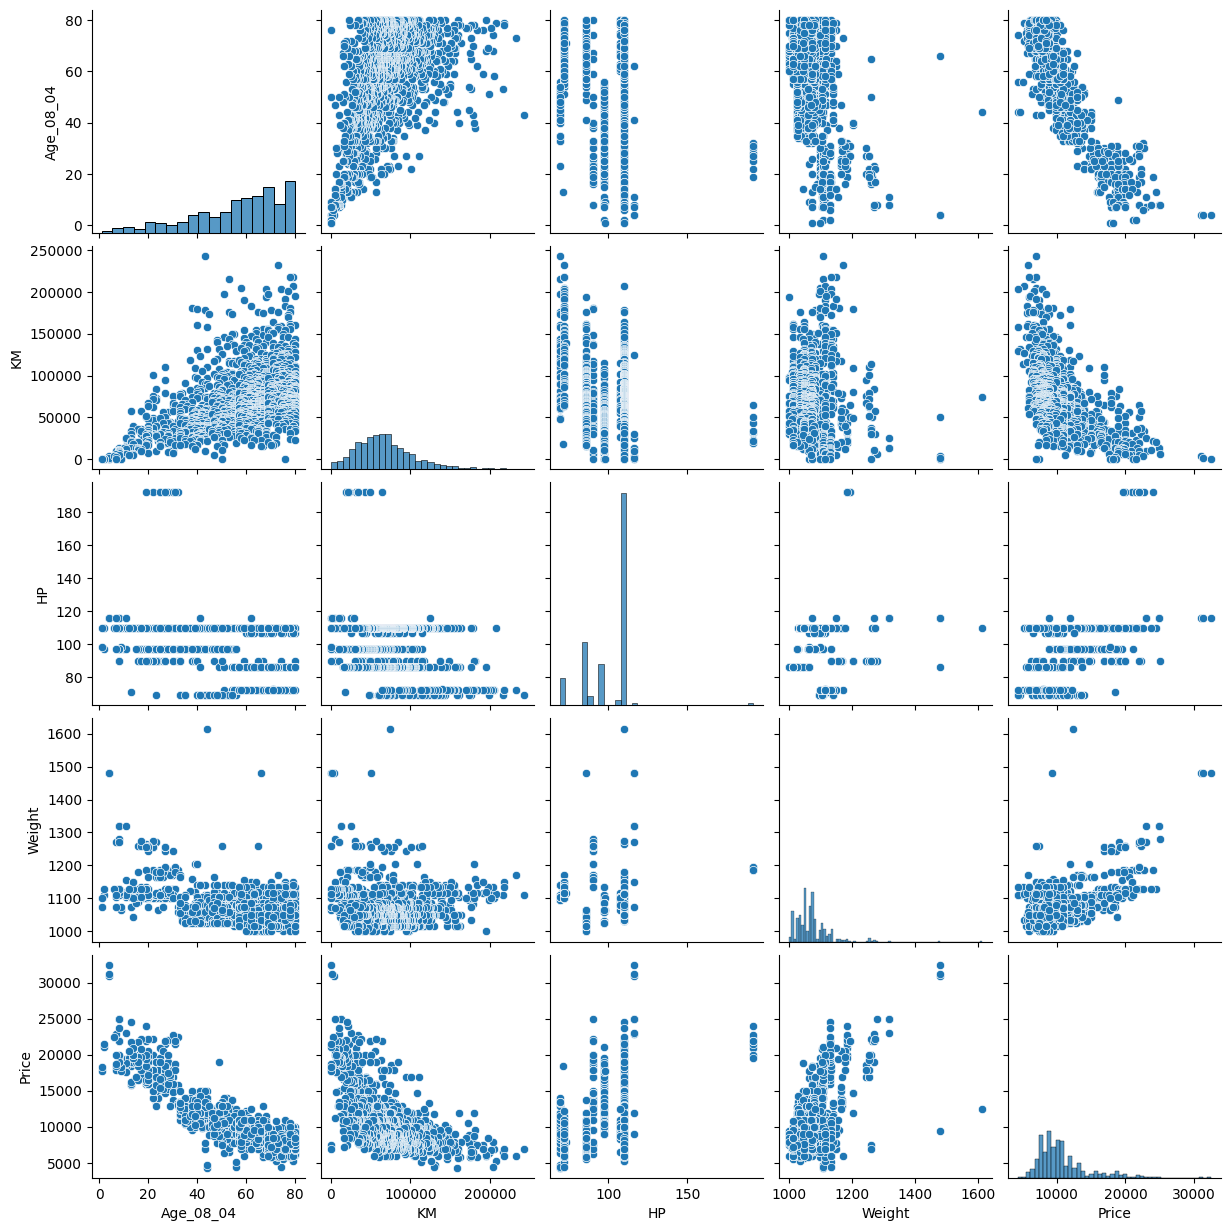

In [10]:
sns.pairplot(df[['Age_08_04','KM','HP','Weight','Price']])
plt.show()

                                                   ...................                                               

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [11]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1148, 9)
Testing set size: (288, 9)


                                              .................                                                          

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

In [12]:
# Model:1
model1 = LinearRegression()
model1.fit(X_train, y_train)

print("Model 1 Intercept:", model1.intercept_)
print("Model 1 Coefficients:", list(zip(X.columns, model1.coef_)))


Model 1 Intercept: -11856.940449151622
Model 1 Coefficients: [('Age_08_04', np.float64(-120.82307818940056)), ('KM', np.float64(-0.01592691507563962)), ('HP', np.float64(15.777213290558322)), ('Automatic', np.float64(93.08199343840313)), ('cc', np.float64(-0.030235783082692525)), ('Doors', np.float64(-84.48354652210102)), ('Weight', np.float64(26.069186380531335)), ('Fuel_Type_Diesel', np.float64(4.20210958800029)), ('Fuel_Type_Petrol', np.float64(1453.6944613310611))]


Model : 1                     
Each coefficient shows how much the Price changes for a 1-unit increase in that variable while others remain constant.
                     
For example:              

If “Age” coefficient = -1200 → every extra year decreases price by €1200.

In [13]:
# Model:2
X_train2 = X_train[['Age_08_04','KM','HP','Weight']]
X_test2 = X_test[['Age_08_04','KM','HP','Weight']]

model2 = LinearRegression()
model2.fit(X_train2, y_train)

print("Model 2 Coefficients:", list(zip(X_train2.columns, model2.coef_)))


Model 2 Coefficients: [('Age_08_04', np.float64(-120.02540542943399)), ('KM', np.float64(-0.0202325919529713)), ('HP', np.float64(29.05217038638874)), ('Weight', np.float64(19.769066207220952))]


Model : 2               
It uses the main numeric predictors.

In [14]:
cols = [c for c in X.columns if not c.startswith('Fuel_Type')]
X_train3 = X_train[cols]
X_test3 = X_test[cols]

model3 = LinearRegression()
model3.fit(X_train3, y_train)

print("Model 3 Coefficients:", list(zip(X_train3.columns, model3.coef_)))


Model 3 Coefficients: [('Age_08_04', np.float64(-120.71627506638661)), ('KM', np.float64(-0.01974226614879388)), ('HP', np.float64(29.411493954505517)), ('Automatic', np.float64(308.48242686467177)), ('cc', np.float64(-0.11311792870927127)), ('Doors', np.float64(-19.30858167433709)), ('Weight', np.float64(20.000876066964892))]


Model : 3                    
This model ignores FuelType to see if categorical fuel data significantly impacts prediction accuracy.


                                              .............                                                             

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [15]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("Training R²:", r2_score(y_train, y_pred_train))
    print("Testing R²:", r2_score(y_test, y_pred_test))
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))



In [16]:
print("Model 1 Performance :\n")
evaluate_model(model1, X_train, y_train, X_test, y_test)

print("\nModel 2 Performance :\n")
evaluate_model(model2, X_train2, y_train, X_test2, y_test)

print("\nModel 3 Performance :\n")
evaluate_model(model3, X_train3, y_train, X_test3, y_test)

Model 1 Performance :

Training R²: 0.8694465824043116
Testing R²: 0.8332952678447364
MAE: 992.3013394477402
RMSE: 1491.4107550884644

Model 2 Performance :

Training R²: 0.8642843529878648
Testing R²: 0.8506068681500583
MAE: 1001.2017466053621
RMSE: 1411.85020911323

Model 3 Performance :

Training R²: 0.8648374059407062
Testing R²: 0.8511438727402721
MAE: 997.0488002262779
RMSE: 1409.3104250369215


                                               .........................                                                

5.Apply Lasso and Ridge methods on the model.

In [17]:
# Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
print("\nRidge R²:", ridge.score(X_test, y_test))


Ridge R²: 0.8335556420169213


In [18]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso R²:", lasso.score(X_test, y_test))

Lasso R²: 0.8333180016667006


                                                ......................                                                      

## Interview Questions(For our Reference):


1.What is Normalization & Standardization and how is it helpful?

Normalization and Standardization are two techniques used to scale data so that it can be effectively used in machine learning models.

Normalization is also called Min-Max scaling. Which scales the data to a specific range, usually 0 to 1.       
                     
Formula:         
                Xnorm ​= ​X−Xmin​​ / Xmax​−Xmin
                                               
Which is Helpful for: Algorithms that are sensitive to the scale of data, like KNN and Neural Networks.         


Standardization is also called Z-score scaling. it Centers the data around 0 and scales it so that the standard deviation becomes 1.      
            
Formula:         
                        Xstd​ = σ / X−μ​                             
                   
Which is Helpful for: Algorithms that assume normally distributed data, like Linear Regression, Logistic Regression, and SVM.

### 2.What techniques can be used to address multicollinearity in multiple linear regression?

**Ways to Handle Multicollinearity in Multiple Linear Regression:**

* Remove correlated features – drop features that are highly similar
* Combine features using PCA – merge correlated features into a single one
* Use Lasso or Ridge regression – Lasso can reduce some coefficients to zero, Ridge shrinks large coefficients
* Collect more data – increasing data can reduce multicollinearity
* Center or standardize variables – scales features to make them comparable
